In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

In [2]:
columns = ["Timestamp", "Token", "Language", "Familiarity", "BugsTooObvious", "DifficultyLevel", "Approach", "Problems"]
responses = pd.read_csv("responses.csv")
responses.columns = columns
responses.head()

,Timestamp,Token,Language,Familiarity,BugsTooObvious,DifficultyLevel,Approach,Problems
0,8/26/2020 12:15:14,v133162,Kotlin,1,No,3,Trace the function which is being called and m...,keywords like repeat instead of while.
1,8/26/2020 12:27:25,v133162,Go,1,No,4,Follow the GOL rules and flow of execution,weird syntactic rules of giving error when not...
2,8/28/2020 11:13:35,v297808,Julia,1,No,3,Familiarity with the actual algorithm,I didn't know indices start from 1
3,8/28/2020 11:39:29,v297808,Kotlin,1,No,4,Trying to understand the anomalies with the ou...,"Did not have any language specific problems, t..."
4,8/27/2020 19:38:22,v326525,Julia,1,No,3,Stable state was not found even after running ...,None


In [3]:
columns = ["Token", "Language", "NoOfExecutions", "TimeToFirstBug", "GoogleSearches"]
manualDoc = pd.read_csv("ManualDocumentation.csv", usecols=columns)
manualDoc.head()

,Token,Language,NoOfExecutions,TimeToFirstBug,GoogleSearches
0,v133162,Kotlin,2,6,0
1,v133162,Go,4,4,0
2,v258389,Kotlin,3,20,1
3,v464221,Go,6,18,3
4,v927906,Kotlin,6,11,0


In [4]:
merged = pd.merge(responses, manualDoc, how = 'left', left_on = ['Token', 'Language'], right_on = ['Token', 'Language'])
merged.head()

,Timestamp,Token,Language,Familiarity,BugsTooObvious,DifficultyLevel,Approach,Problems,NoOfExecutions,TimeToFirstBug,GoogleSearches
0,8/26/2020 12:15:14,v133162,Kotlin,1,No,3,Trace the function which is being called and m...,keywords like repeat instead of while.,2,6,0
1,8/26/2020 12:27:25,v133162,Go,1,No,4,Follow the GOL rules and flow of execution,weird syntactic rules of giving error when not...,4,4,0
2,8/28/2020 11:13:35,v297808,Julia,1,No,3,Familiarity with the actual algorithm,I didn't know indices start from 1,3,8,0
3,8/28/2020 11:39:29,v297808,Kotlin,1,No,4,Trying to understand the anomalies with the ou...,"Did not have any language specific problems, t...",3,2,1
4,8/27/2020 19:38:22,v326525,Julia,1,No,3,Stable state was not found even after running ...,None,6,1,0


In [5]:
kotlin = merged[merged.Language == "Kotlin"]
go = merged[merged.Language == "Go"]
julia = merged[merged.Language == "Julia"]

languages = [kotlin, go, julia]

In [6]:
langs = ["Kotlin", "Go", "Julia"]
i = 0
for language in languages:
    lang = langs[i]
    i = i + 1
    median_familiarity = np.median(language.Familiarity)
    median_difficulty = np.median(language.DifficultyLevel)
    avg_time_to_firstbug = np.mean(language.TimeToFirstBug)
    avg_no_of_exec = np.mean(language.NoOfExecutions)
    display(Markdown("## Statistics for " + lang + ": "))
    display(Markdown("Number of **Observations**: " + str(len(language))))
    display(Markdown("Median **Familiarity** is: " + str(median_familiarity)))
    display(Markdown("Median **Difficulty** is: " + str(median_difficulty)))
    display(Markdown("Mean **Time required to solve first bug** is: " + str(round(avg_time_to_firstbug, 2))))
    display(Markdown("Mean **number of executions** is: " + str(round(avg_no_of_exec, 2))))
    display(Markdown("\n"))

## Statistics for Kotlin: 

Number of **Observations**: 8

Median **Familiarity** is: 1.0

Median **Difficulty** is: 3.0

Mean **Time required to solve first bug** is: 7.75

Mean **number of executions** is: 3.88

## Statistics for Go: 

Number of **Observations**: 5

Median **Familiarity** is: 2.0

Median **Difficulty** is: 3.0

Mean **Time required to solve first bug** is: 6.2

Mean **number of executions** is: 4.2

## Statistics for Julia: 

Number of **Observations**: 7

Median **Familiarity** is: 1.0

Median **Difficulty** is: 3.0

Mean **Time required to solve first bug** is: 5.71

Mean **number of executions** is: 4.0

## From the above statistics, it can be concluded that:
1. Mean time required to solve the first bug was the maximum in **Kotlin**
2. In comparison with other languages, **Go** had the more number of users with high familiarity.

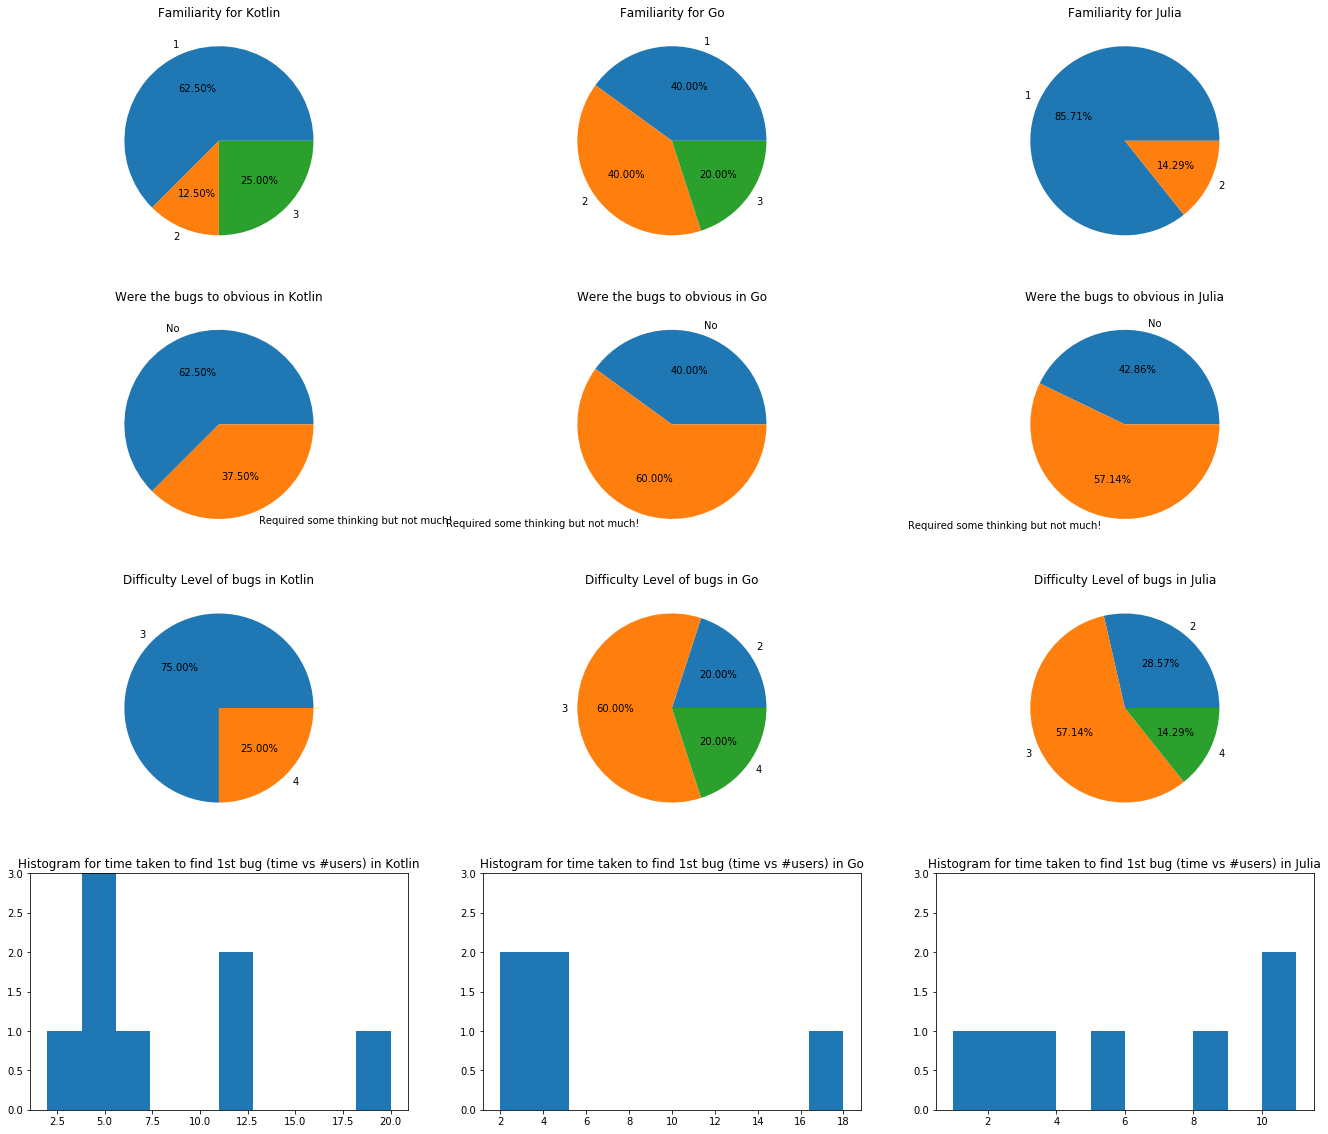

In [7]:
langs = ["Kotlin", "Go", "Julia"]
i = 0
fig, axes = plt.subplots(4, 3, figsize = (23, 20))
for language in languages:
    lang = langs[i]
    
    labels = []
    data = []
    for c, df in language.groupby("Familiarity"):
        labels.append(c)
        data.append(len(df))
    axes[(i // 4), i].pie(data, labels = labels, autopct='%1.2f%%')
    axes[(i // 4), i].set_title("Familiarity for " + lang)
    
    labels = []
    data = [] 
    for c, df in language.groupby("BugsTooObvious"):
        labels.append(c)
        data.append(len(df))
    axes[(i // 4) + 1, i].pie(data, labels = labels, autopct='%1.2f%%')
    axes[(i // 4) + 1, i].set_title("Were the bugs to obvious in " + lang)
    
    labels = []
    data = []
    for c, df in language.groupby("DifficultyLevel"):
        labels.append(c)
        data.append(len(df))
    axes[(i // 4) + 2, i].pie(data, labels = labels, autopct='%1.2f%%')
    axes[(i // 4) + 2, i].set_title("Difficulty Level of bugs in " + lang)
    
    axes[(i // 4) + 3, i].set_ylim(0, 3)
    axes[(i // 4) + 3, i].hist(language["TimeToFirstBug"])
    axes[(i // 4) + 3, i].set_title("Histogram for time taken to find 1st bug (time vs #users) in " + lang)
    
    i = i + 1
      
plt.show()

## From the above graphs, it can be concluded that:
1. **Go** was the most familiar language and **Julia** was the least familiar language.
2. **Kotlin** had the least obvious bugs.
3. In general, difficulty level of bugs in **Kotlin** was more than other languages.
4. More number of users took longer times in **Kotlin** as compared to other languages.

In [8]:
for t, df in merged.groupby('Token'):
    if len(df) > 1:
        for f, df1 in df.groupby('Familiarity'):
            if len(df1) > 1:
                for idx, row in df1.iterrows():
                    print('Language :   ' + row["Language"] + '   Time to solve first bug : ' + str(row["TimeToFirstBug"]))
                print("\n")

Language :   Kotlin   Time to solve first bug : 6
Language :   Go   Time to solve first bug : 4


Language :   Julia   Time to solve first bug : 8
Language :   Kotlin   Time to solve first bug : 2


Language :   Julia   Time to solve first bug : 1
Language :   Kotlin   Time to solve first bug : 4


Language :   Go   Time to solve first bug : 4
Language :   Julia   Time to solve first bug : 2
Language :   Kotlin   Time to solve first bug : 4


Language :   Julia   Time to solve first bug : 5
Language :   Kotlin   Time to solve first bug : 11


Language :   Julia   Time to solve first bug : 10
Language :   Kotlin   Time to solve first bug : 4
Language :   Go   Time to solve first bug : 2




## From the above observations, it can be concluded that:

| Equally familiar languages | List of language which took longer time for all observations |
|---|---|
| Kotlin, Go | Kotlin |
| Julia, Kotlin | Julia, Kotlin, Kotlin |
| Go, Julia, Kotlin | (Kotlin, Go), Julia  |

Observing the table, it can be concluded that based on time, **Kotlin** was the most difficult language to debug.

## Considering all the observations until now, it can be concluded that **Kotlin** was the most difficult language to debug.